===================================================================================================================================================

# Завдання 3

===================================================================================================================================================

# Landsat - 8

Список ідентифікаторів Landsat-8:<br>
    1. LC08_L1TP_182025_20190830_20190903_01_T1<br>
    2. LC08_L1TP_182026_20190830_20190903_01_T1<br>

First step it`s download data....

Setup library

In [3]:
import os
import subprocess
import glob
from glob import glob
from osgeo import gdal, osr
import rasterio
from rasterio.plot import show
import sklearn.metrics
import matplotlib.pyplot as plt
from pylandsat.download import Product
from tqdm import tqdm

print("Setup!")

/home/kali/Desktop/data_analysis/Data_Analysis_git/workspace_7_2/lib/python3.11/site-packages/rasterio/path.py:15: RasterioDeprecationWarning: rasterio.path will be removed in version 1.4.
  warnings.warn(


Setup!


Function which can download satellite data 

In [17]:
def download_data_landsat_8(directory, scene_ids):
      
    os.makedirs(directory, exist_ok=True)

    for scene_id in scene_ids:
        product = Product(scene_id)
        scene_dir = os.path.join(directory, scene_id)
        
        try:
            print(f"Завантаження знімка {scene_id}...")
            product.download(scene_dir, progressbar=True, verify=False)
        except Exception as e:
            print(f"Помилка завантаження знімка {scene_id}: {e}")
            continue
        else:
            if os.path.isdir(scene_dir):
                contents = os.listdir(scene_dir)
                required_files = [f"{scene_id}_B1.TIF", f"{scene_id}_MTL.txt"]
                if all(f in contents for f in required_files):
                    print(f"Знімок {scene_id} завантажено успішно.")
                else:
                    print(f"Помилка завантаження знімка {scene_id}: відсутні необхідні файли.")
            else:
                print(f"Помилка завантаження знімка {scene_id}: каталог не створено.")

Start process of downloading....

In [18]:
directory = 'landsat_8'
scene_ids = [
    "LC08_L1TP_182025_20190830_20190903_01_T1",
    "LC08_L1TP_182026_20190830_20190903_01_T1"
]
download_data_landsat_8(directory, scene_ids)

Завантаження знімка LC08_L1TP_182025_20190830_20190903_01_T1...


































































































































































































LC08_L1TP_182025_20190830_20190903_01_T1_B1.TIF: : 65.0MB [00:10, 5.93MB/s]






































































































































































































LC08_L1TP_182025_20190830_20190903_01_T1_B2.TIF: : 67.1MB [00:11, 5.93MB/s]















































































































































































































LC08_L1TP_182025_20190830_20190903_01_T1_B3.TIF: : 71.3MB [00:12, 5.91MB/s]                          























































































































































Помилка завантаження знімка LC08_L1TP_182025_20190830_20190903_01_T1: відсутні необхідні файли.
Завантаження знімка LC08_L1TP_182026_20190830_20190903_01_T1...





































































































































































































LC08_L1TP_182026_20190830_20190903_01_T1_B1.TIF: : 66.1MB [00:11, 5.81MB/s]









































































































































































































LC08_L1TP_182026_20190830_20190903_01_T1_B2.TIF: : 69.2MB [00:11, 6.04MB/s]                          





















































































































































































































LC08_L1TP_182026_20190830_20190903_01_T1_B3.TIF: : 73.4MB [00:12, 5.92MB/s]                          

















































































































Помилка завантаження знімка LC08_L1TP_182026_20190830_20190903_01_T1: відсутні необхідні файли.


Also you can download data with two command: 

<i>1) pip install pylandsat</i><br>
<i>2) pylandsat download LC08_L1TP_182025_20190830_20190903_01_T1 LC08_L1TP_182026_20190830_20190903_01_T1</i>

===================================================================================================================================================

<h3>- Протестувати різні реалізовані в gdal методи паншарпенінгу. Для цього підготуйте склеєні RGB канали Landsat-8 та окремо панхроматичний
канал.</h3> 



<i>Concatenate RGB</i>

In [19]:
def concatenate_bands(input_dir, output_dir):
    bands = ['B2', 'B3', 'B4']
    band_files = []

    # Створюємо директорію для вихідного файлу, якщо її не існує
    os.makedirs(output_dir, exist_ok=True)

    # Знаходимо файли каналів за шаблоном
    for band in bands:
        band_pattern = os.path.join(input_dir, f"*_{band}.TIF")
        band_path = glob(band_pattern)
        if not band_path:
            print(f"Файл каналу {band} не знайдено в директорії {input_dir}")
            return
        band_files.append(band_path[0])

    # Формуємо шлях до вихідного файлу
    output_file = os.path.join(output_dir, "concatenated_RGB.tif")

    # Виконуємо конкатенацію каналів
    gm = "gdal_merge.py"
    merge_command = [gm, "-separate", "-o", output_file] + band_files
    subprocess.run(merge_command)
    print(f"Конкатенація каналів завершена. Результат записано у файл {output_file}")

Process of conatenation....

In [20]:
img_data_25_path = os.path.join("landsat_8", 
                                "LC08_L1TP_182025_20190830_20190903_01_T1", 
                                "LC08_L1TP_182025_20190830_20190903_01_T1")
img_data_26_path = os.path.join("landsat_8", 
                                "LC08_L1TP_182026_20190830_20190903_01_T1", 
                                "LC08_L1TP_182026_20190830_20190903_01_T1")

concatenated_directory_25_RGB = "concat_LC08_25_RGB"
concatenated_directory_26_RGB = "concat_LC08_26_RGB"

print("Обробка LC08_L1TP_182025_20190830_20190903_01_T1")
print("Процес конкатинації....")
concatenate_bands(img_data_25_path, concatenated_directory_25_RGB)

print("=" * 90)

print("Обробка LC08_L1TP_182026_20190830_20190903_01_T1")
print("Процес конкатинації....")
concatenate_bands(img_data_26_path, concatenated_directory_26_RGB)

Обробка LC08_L1TP_182025_20190830_20190903_01_T1
Процес конкатинації....
0...10...20...30...40...50...60...70...80...90...100 - done.
Конкатенація каналів завершена. Результат записано у файл concat_LC08_25_RGB/concatenated_RGB.tif
Обробка LC08_L1TP_182026_20190830_20190903_01_T1
Процес конкатинації....
0...10...20...30...40...50...60...70...80...90...100 - done.
Конкатенація каналів завершена. Результат записано у файл concat_LC08_26_RGB/concatenated_RGB.tif


<h4>SHOW with rasterio and plt....</h4>

In [45]:
def open_and_display_tif(tif_file):
    try:
        # Відкриття файлу .tif за допомогою rasterio
        with rasterio.open(tif_file) as dataset:
            # Відображення зображення з вказаною колірною схемою            
            print(f"Displaying {tif_file}")
            fig, ax = plt.subplots(figsize=(10, 8))
            show(dataset, ax=ax, adjust=True)
              
            # Додаємо підпис до картинки
            ax.set_title(f"TIF Image: {tif_file}")
                
            plt.show()
            
    except Exception as e:
        print(f"An error occurred while opening the TIFF file: {e}")

Show first part RGB from id LC08_L1TP_182025_20190830_20190903_01_T1....

Displaying ./concat_LC08_25_RGB/concatenated_RGB.tif


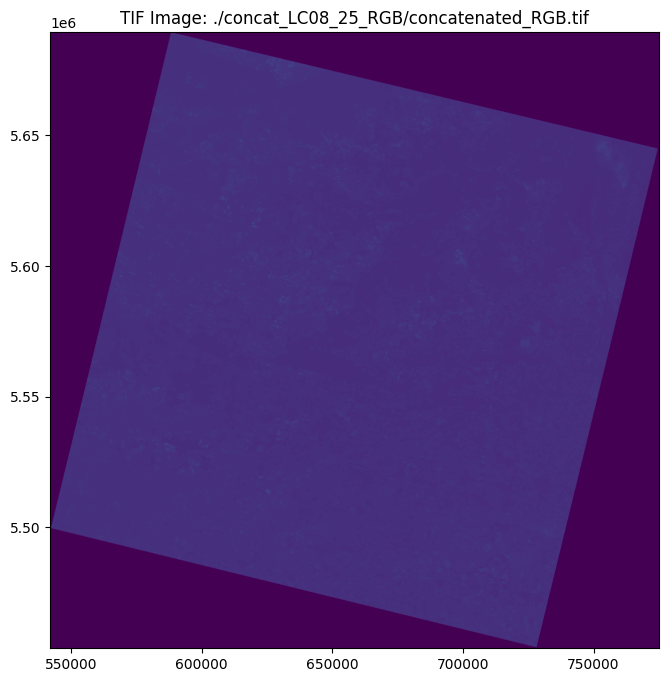

In [46]:
open_and_display_tif('./concat_LC08_25_RGB/concatenated_RGB.tif')  

Show second part RGB from id LC08_L1TP_182026_20190830_20190903_01_T1.....

Displaying ./concat_LC08_26_RGB/concatenated_RGB.tif


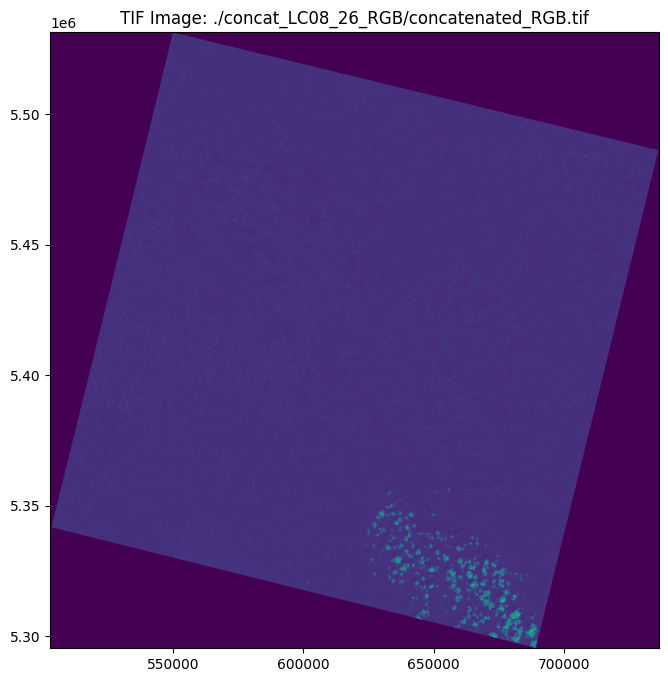

In [47]:
open_and_display_tif('./concat_LC08_26_RGB/concatenated_RGB.tif')  

<h4>- Конкатенація каналів видимого, ближнього та середнього інфрачервоного спектральних діапазонів (канали 2, 3, 4 та 8) зображення в єдиний GEOTIFF файл.</h4> 

In [27]:
def concatenate_bands_B8(input_dir, output_dir):
    bands = ['B2', 'B3', 'B4', 'B8']
    band_files = []

    # Створюємо директорію для вихідного файлу, якщо її не існує
    os.makedirs(output_dir, exist_ok=True)

    # Знаходимо файли каналів за шаблоном
    for band in bands:
        band_pattern = os.path.join(input_dir, f"*_{band}.TIF")
        band_path = glob(band_pattern)
        if not band_path:
            print(f"Файл каналу {band} не знайдено в директорії {input_dir}")
            return
        band_files.append(band_path[0])

    # Формуємо шлях до вихідного файлу
    output_file = os.path.join(output_dir, "concatenated.tif")

    # Виконуємо конкатенацію каналів
    gm = "gdal_merge.py"
    merge_command = [gm, "-separate", "-o", output_file] + band_files
    subprocess.run(merge_command)
    print(f"Конкатенація каналів завершена. Результат записано у файл {output_file}")

In [29]:
img_data_25_path = os.path.join("landsat_8", 
                                "LC08_L1TP_182025_20190830_20190903_01_T1", 
                                "LC08_L1TP_182025_20190830_20190903_01_T1")
img_data_26_path = os.path.join("landsat_8", 
                                "LC08_L1TP_182026_20190830_20190903_01_T1", 
                                "LC08_L1TP_182026_20190830_20190903_01_T1")

concatenated_directory_25 = "concat_LC08_25"
concatenated_directory_26 = "concat_LC08_26"

print("Обробка LC08_L1TP_182025_20190830_20190903_01_T1")
print("Процес конкатинації....")
concatenate_bands_B8(img_data_25_path, concatenated_directory_25)

print("=" * 90)

print("Обробка LC08_L1TP_182026_20190830_20190903_01_T1")
print("Процес конкатинації....")
concatenate_bands_B8(img_data_26_path, concatenated_directory_26)

Обробка LC08_L1TP_182025_20190830_20190903_01_T1
Процес конкатинації....
0...10...20...30...40...50...60...70...80...90...100 - done.
Конкатенація каналів завершена. Результат записано у файл concat_LC08_25/concatenated.tif
Обробка LC08_L1TP_182026_20190830_20190903_01_T1
Процес конкатинації....
0...10...20...30...40...50...60...70...80...90...100 - done.
Конкатенація каналів завершена. Результат записано у файл concat_LC08_26/concatenated.tif


Show first part from id LC08_L1TP_182025_20190830_20190903_01_T1....

Displaying ./concat_LC08_25/concatenated.tif


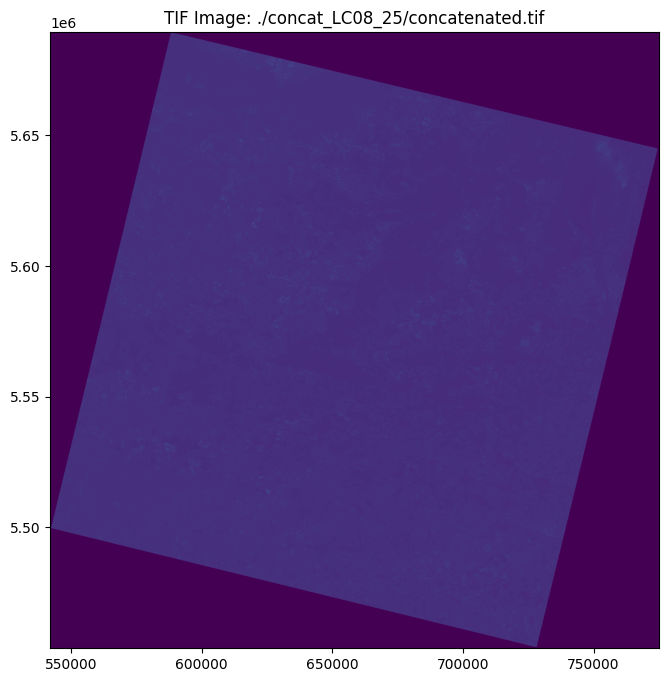

In [48]:
open_and_display_tif('./concat_LC08_25/concatenated.tif')  

Show second part from id LC08_L1TP_182026_20190830_20190903_01_T1....

Displaying ./concat_LC08_26/concatenated.tif


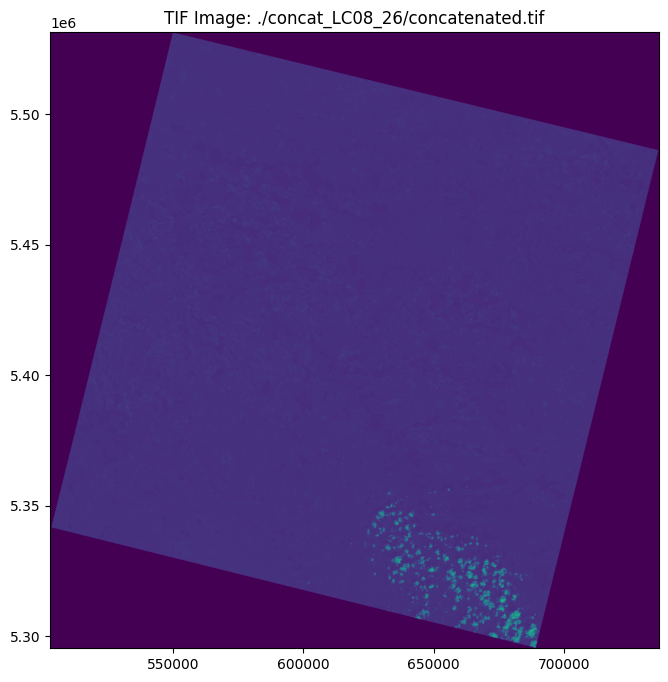

In [49]:
open_and_display_tif('./concat_LC08_26/concatenated.tif')  

<h4>- Перепроектування супутникового зображення у проєкцію 4326.</h4>

In [32]:
def reproject_directory(input_dir, output_dir, target_epsg=4326):
    os.makedirs(output_dir, exist_ok=True)
    
    for filename in tqdm(os.listdir(input_dir), desc="Перепроектування файлів"):
        if filename.endswith((".tif", ".tiff")):
            reproject_to_target(
                os.path.join(input_dir, filename),
                os.path.join(output_dir, filename),
                target_epsg
            )

def reproject_to_target(input_raster, output_raster, target_epsg):
    try:
        with gdal.Open(input_raster) as src_ds:
            src_proj = src_ds.GetProjectionRef()
            
            dst_srs = osr.SpatialReference()
            dst_srs.ImportFromEPSG(target_epsg)
            
            gdal.Warp(output_raster, 
                      src_ds, 
                      dstSRS=dst_srs, 
                      transformerOptions=['SRC_SRS='+src_proj, 'DST_SRS='+dst_srs.ExportToWkt()])
        
        print(f"Перепроектування {input_raster} завершено. Вихідний файл: {output_raster}")
    except Exception as e:
        print(f"Помилка при перепроектуванні {input_raster}: {e}")

Show first part RGB from id LC08_L1TP_182025_20190830_20190903_01_T1....

In [33]:
input_dir = "./concat_LC08_25_RGB"
output_dir = "./reproject_LC08_25_RGB"  
reproject_directory(input_dir, output_dir)




/home/kali/Desktop/data_analysis/Data_Analysis_git/workspace_7_2/lib/python3.11/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(



Перепроектування файлів: 100%|██████████| 1/1 [00:01<00:00,  1.79s/it]

Перепроектування ./concat_LC08_25_RGB/concatenated_RGB.tif завершено. Вихідний файл: ./reproject_LC08_25_RGB/concatenated_RGB.tif


Displaying ./reproject_LC08_25_RGB/concatenated_RGB.tif


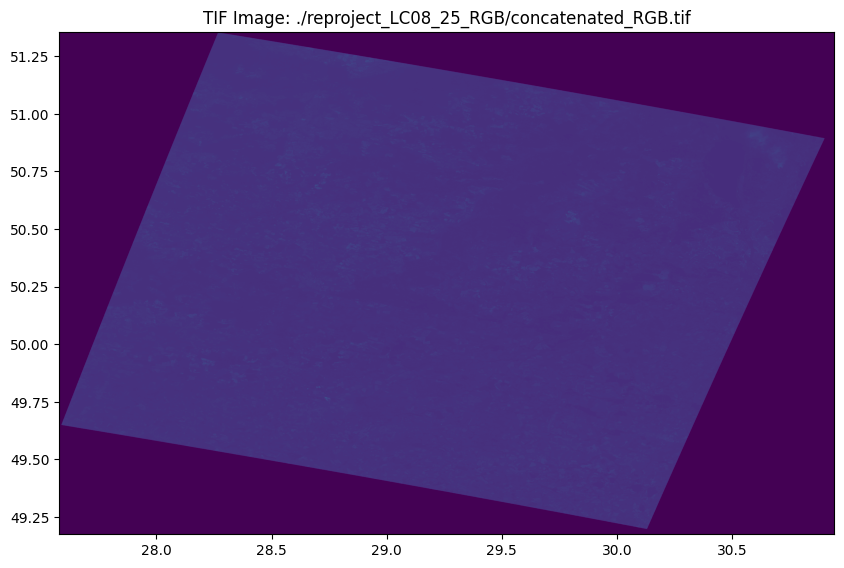

In [50]:
open_and_display_tif('./reproject_LC08_25_RGB/concatenated_RGB.tif')  

Show second part RGB from id LC08_L1TP_182026_20190830_20190903_01_T1....

In [35]:
input_dir = "./concat_LC08_26_RGB"
output_dir = "./reproject_LC08_26_RGB"  
reproject_directory(input_dir, output_dir)







Перепроектування файлів: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]

Перепроектування ./concat_LC08_26_RGB/concatenated_RGB.tif завершено. Вихідний файл: ./reproject_LC08_26_RGB/concatenated_RGB.tif


Displaying ./reproject_LC08_26_RGB/concatenated_RGB.tif


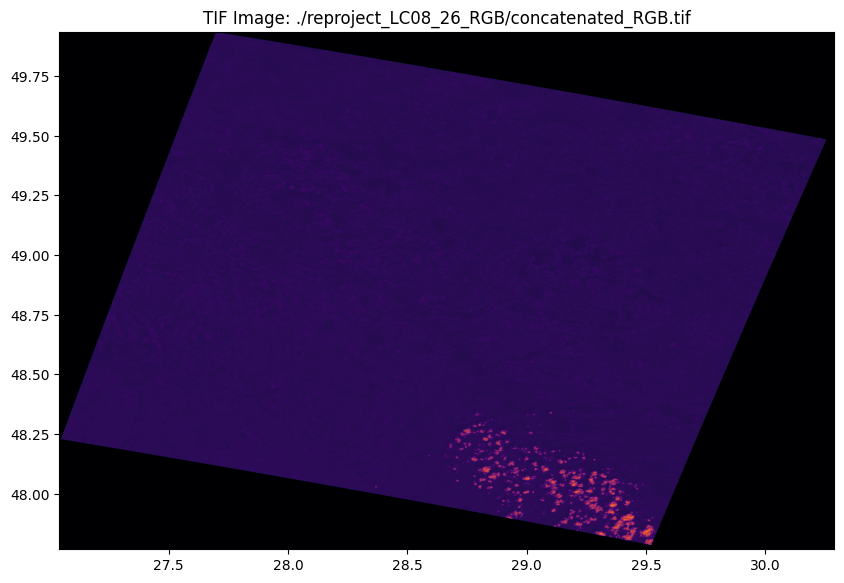

In [36]:
open_and_display_tif('./reproject_LC08_26_RGB/concatenated_RGB.tif', cmap='inferno')  

<h4>- Конкатенація всіх отриманих растрів у один 4-канальний файл TIFF. </h4>

In [5]:
def concatenate_all(directory_A, directory_B, output_file='output_4.tif'):
    # Перевірка існування директорій
    if not os.path.exists(directory_A) or not os.path.exists(directory_B):
        print("One or both directories do not exist.")
        return

    # Збір всіх файлів .tif з обох директорій
    tif_files = []
    for directory in [directory_A, directory_B]:
        for filename in os.listdir(directory):
            if filename.endswith('.tif'):
                tif_files.append(os.path.join(directory, filename))
    
    # Використання gdal_merge.py для конкатенації
    gdal_merge_command = ['gdal_merge.py', '-o', output_file] + tif_files
    os.system(' '.join(gdal_merge_command))

    print(f"Concatenated file created: {output_file}")

RGB_CONCAT

In [38]:
directory_A = "./concat_LC08_25_RGB"
directory_B = "./concat_LC08_26_RGB"
output_file = "original_LC08_25_26_RGB.tif"
concatenate_all(directory_A, directory_B, output_file)

0...10...20...30...40...50...60...70...80...90...100 - done.
Concatenated file created: original_LC08_25_26_RGB.tif


Showing...

Displaying original_LC08_25_26_RGB.tif


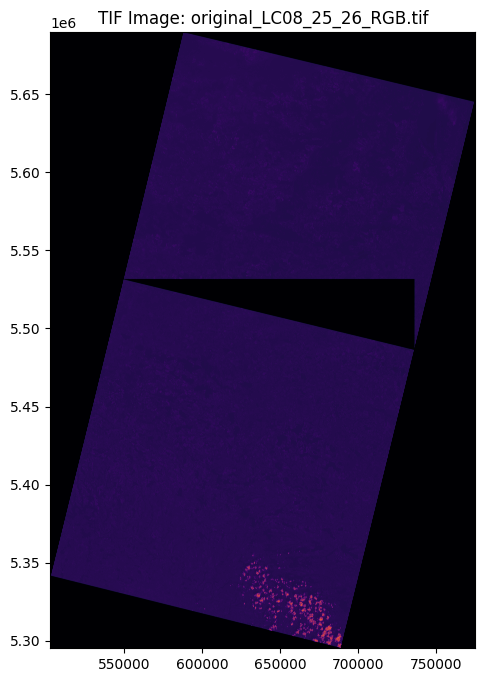

In [39]:
open_and_display_tif('original_LC08_25_26_RGB.tif', cmap='inferno')

REPROJ_RGB

In [40]:
directory_A = "./reproject_LC08_25_RGB"
directory_B = "./reproject_LC08_26_RGB"
output_file = "LC08_25_26_RGB.tif"
concatenate_all(directory_A, directory_B, output_file)

0...10...20...30...40...50...60...70...80...90...100 - done.
Concatenated file created: LC08_25_26_RGB.tif


Showing...

Displaying LC08_25_26_RGB.tif


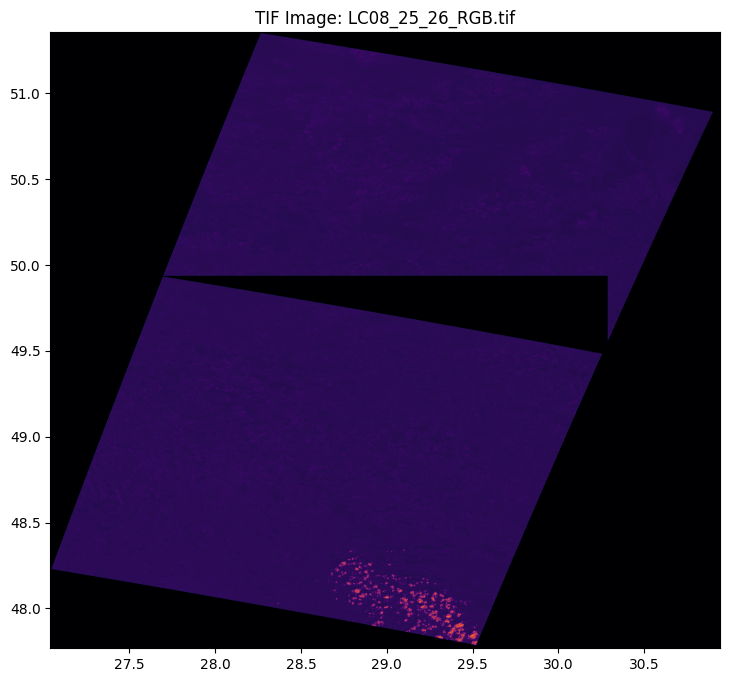

In [41]:
open_and_display_tif('LC08_25_26_RGB.tif', cmap='inferno')

4_CONCAT

In [6]:
directory_A = "./concat_LC08_25"
directory_B = "./concat_LC08_26"
output_file = "4_original_LC08_25_26.tif"
concatenate_all(directory_A, directory_B, output_file)

0...10...20...30...40...50...60...70...80...90...100 - done.
Concatenated file created: 4_original_LC08_25_26.tif


Showing...

Displaying 4_original_LC08_25_26.tif


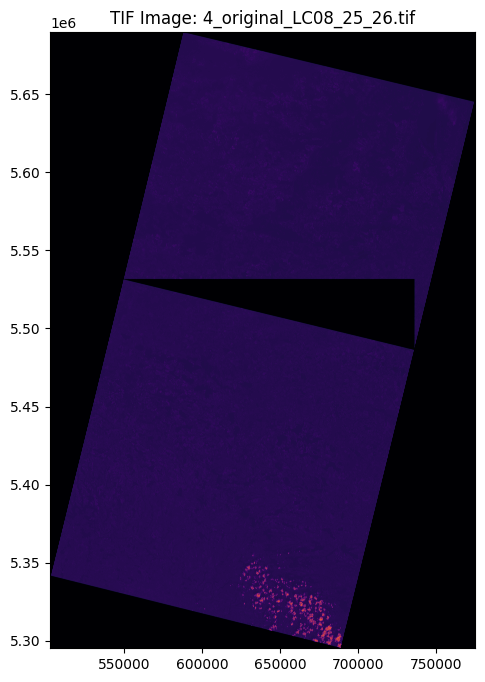

In [9]:
open_and_display_tif('4_original_LC08_25_26.tif', cmap='inferno')

<h4>- Обріжте зображення за вашим векторним файлом використовуючи gdalwarp</h4>


In [44]:
def gdalwarp_cutline(input_image, output_image, shapefile):
    try:
        command = f"gdalwarp -cutline {shapefile} -crop_to_cutline {input_image} {output_image}"
        subprocess.run(command, shell=True, check=True)        
        print("Image successfully cropped using gdalwarp.")
    
    except subprocess.CalledProcessError as e:
        print(f"An error occurred while cropping the image using gdalwarp: {e}")

Cutline RGB with id LC08_L1TP_182025_20190830_20190903_01_T1

In [46]:
input_image = "original_LC08_25_26_RGB.tif"
output_image = "original_LC08_25_26_RGB_cutted.tif"
shapefile = "./GUI_data/Kyiv_regions.shp"
gdalwarp_cutline(input_image, output_image, shapefile)

Creating output file that is 1365P x 1370L.
Processing original_LC08_25_26_RGB.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Image successfully cropped using gdalwarp.


Showing...

Displaying original_LC08_25_26_RGB_cutted.tif


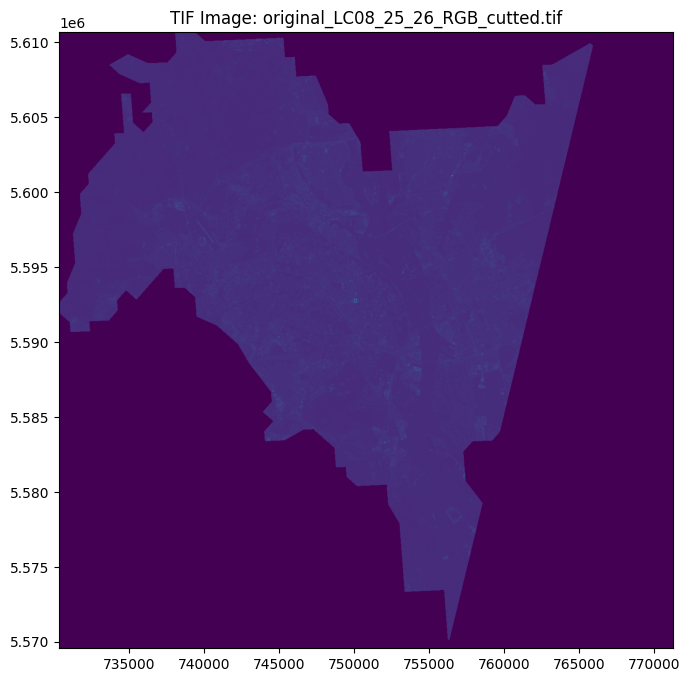

In [52]:
open_and_display_tif('original_LC08_25_26_RGB_cutted.tif')

Cutline RGB with id LC08_L1TP_182026_20190830_20190903_01_T1

In [48]:
input_image = "LC08_25_26_RGB.tif"
output_image = "LC08_25_26_RGB_cutted.tif"
shapefile = "./GUI_data/Kyiv_regions.shp"
gdalwarp_cutline(input_image, output_image, shapefile)

Creating output file that is 1647P x 1081L.
Processing LC08_25_26_RGB.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Image successfully cropped using gdalwarp.


Showing....

Displaying LC08_25_26_RGB_cutted.tif


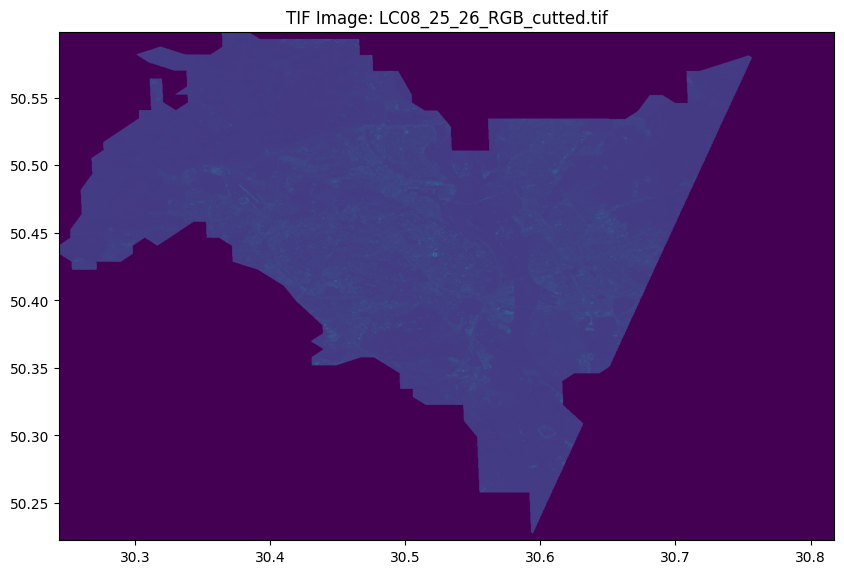

In [51]:
open_and_display_tif('LC08_25_26_RGB_cutted.tif')

===================================================================================================================================================

<h3>- Переведіть панхроматичний канал у 30 м, а RGB канали у 60 метрів.</h3>

In [10]:
def create_directory(directory_name):
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
        print(f"Directory '{directory_name}' created successfully.")
    else:
        print(f"Directory '{directory_name}' already exists.")

def gdal_translate(input_image, output_image, target_resolution):
    try:
        command = f"gdal_translate -tr {target_resolution} {target_resolution} {input_image} {output_image}"
        subprocess.run(command, shell=True, check=True)
        
        print("Image successfully translated using gdal_translate.")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred while translating the image using gdal_translate: {e}")

gdal_translate (30 m)

In [11]:
directory_name = "./LANDSAT_PANSHARPEN"
create_directory(directory_name)
gdal_translate("./landsat_8/LC08_L1TP_182025_20190830_20190903_01_T1/LC08_L1TP_182025_20190830_20190903_01_T1/LC08_L1TP_182025_20190830_20190903_01_T1_B8.TIF", os.path.join(directory_name, "RGB_PANSHARPEN_30_B8.tif"), target_resolution=30)

Directory './LANDSAT_PANSHARPEN' already exists.
Input file size is 15521, 15721
0...10...20...30...40...50...60...70...80...90...100 - done.
Image successfully translated using gdal_translate.


Show with rasterio and plt...

Displaying ./LANDSAT_PANSHARPEN/RGB_PANSHARPEN_30_B8.tif


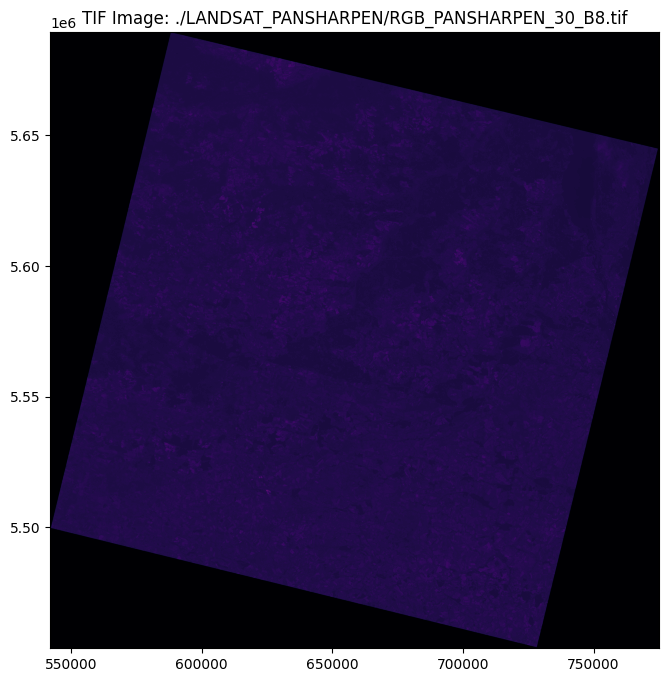

In [12]:
open_and_display_tif("./LANDSAT_PANSHARPEN/RGB_PANSHARPEN_30_B8.tif", cmap="inferno")

gdal_translate(60 m)

In [19]:
gdal_translate("./concat_LC08_25_RGB/concatenated_RGB.tif", os.path.join(directory_name, "RGB_PANSHARPEN_60.tif"), target_resolution=60)

Input file size is 7761, 7861
0...10...20...30...40...50...60...70...80...90...100 - done.
Image successfully translated using gdal_translate.


Show with rasterio and plt...

Displaying ./LANDSAT_PANSHARPEN/RGB_PANSHARPEN_60.tif


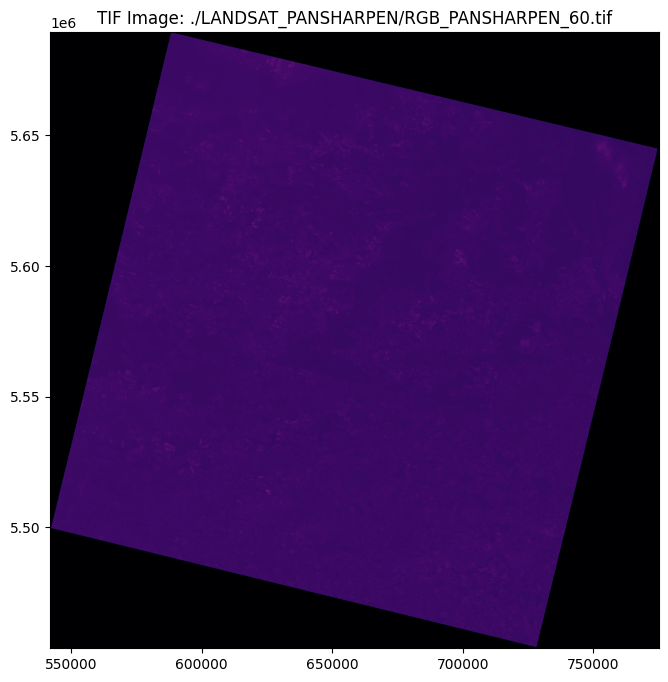

In [20]:
open_and_display_tif("./LANDSAT_PANSHARPEN/RGB_PANSHARPEN_60.tif", cmap="inferno")

===================================================================================================================================================

<h3>- Після цього паншарпніть 60 метровий RGB за допомогою 30 м
панхроматичного каналу.</h3>

In [21]:
pansharpen_methods = ['average', 'nearest', 'bilinear', 'cubic', 'cubicspline', 'lanczos']

for method in pansharpen_methods:
    output_file = f'./LANDSAT_PANSHARPEN/PANSHARPEN_{method}.tif'
    gdal_pansharpen_cmd = f'gdal_pansharpen.py -r {method} ./LANDSAT_PANSHARPEN/RGB_PANSHARPEN_30_B8.tif ./LANDSAT_PANSHARPEN/RGB_PANSHARPEN_60.tif {output_file}'
    os.system(gdal_pansharpen_cmd)

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


<h4>SHOW with rasterio and plt....</h4>

Displaying ./LANDSAT_PANSHARPEN/PANSHARPEN_average.tif


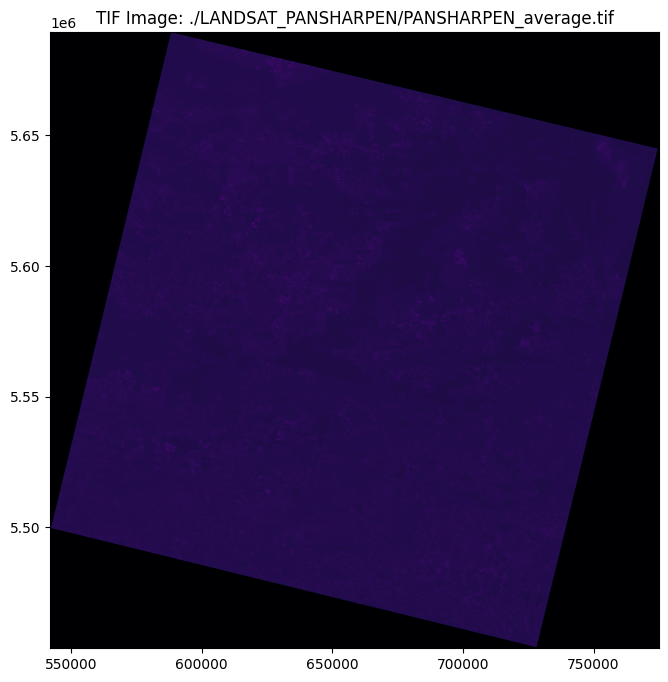

Displaying ./LANDSAT_PANSHARPEN/PANSHARPEN_nearest.tif


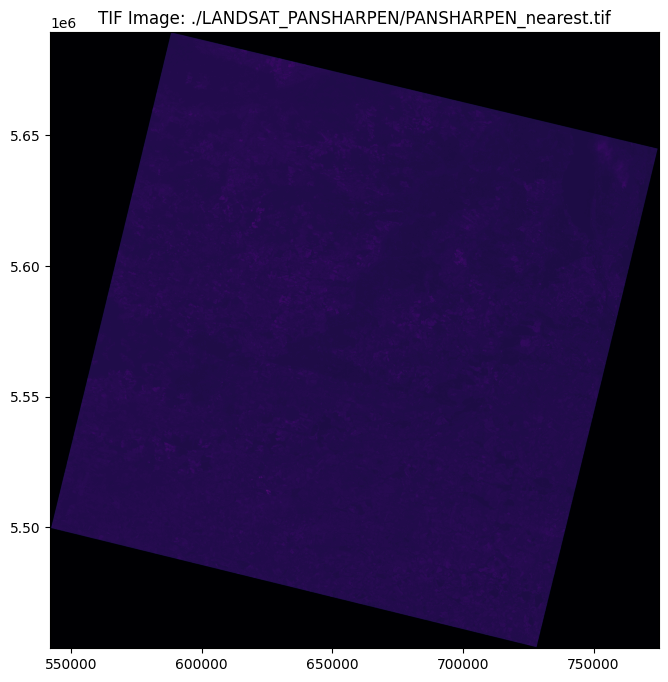

Displaying ./LANDSAT_PANSHARPEN/PANSHARPEN_bilinear.tif


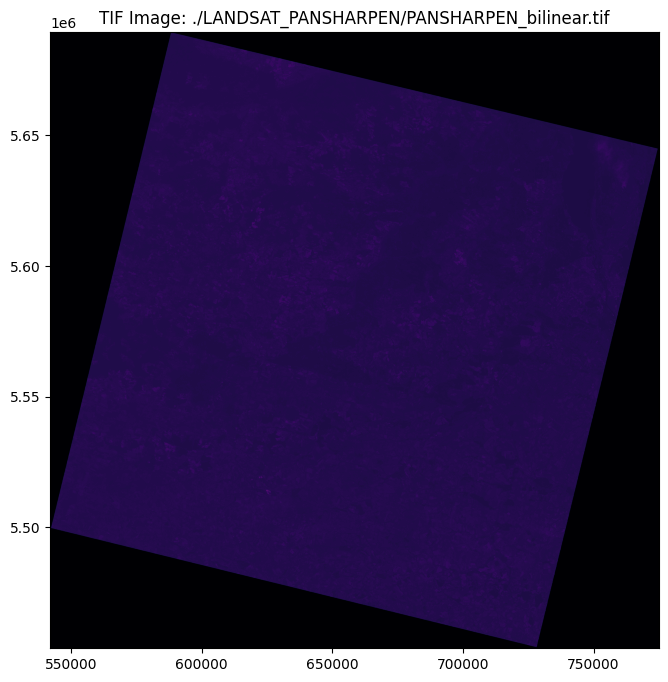

Displaying ./LANDSAT_PANSHARPEN/PANSHARPEN_cubic.tif


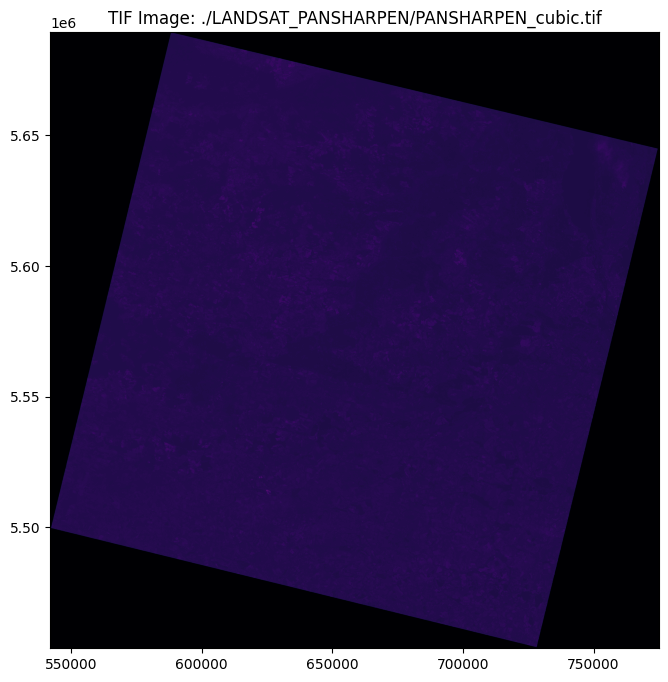

Displaying ./LANDSAT_PANSHARPEN/PANSHARPEN_cubicspline.tif


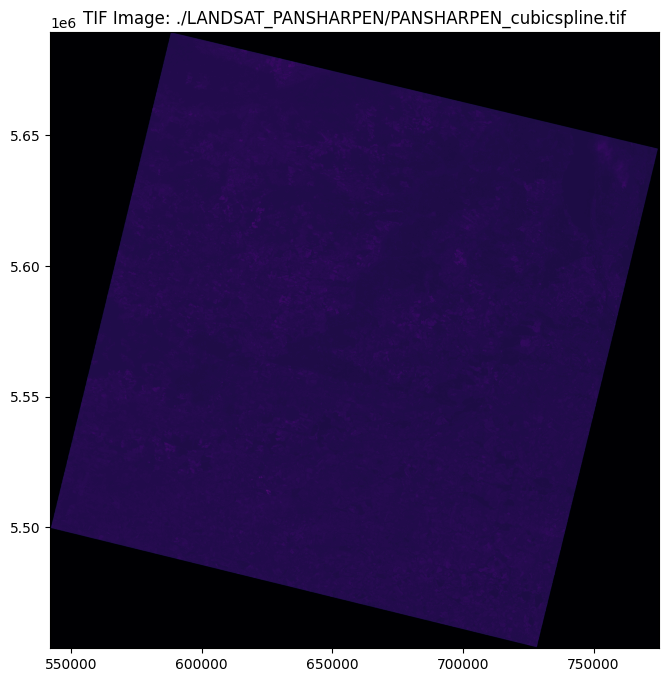

Displaying ./LANDSAT_PANSHARPEN/PANSHARPEN_lanczos.tif


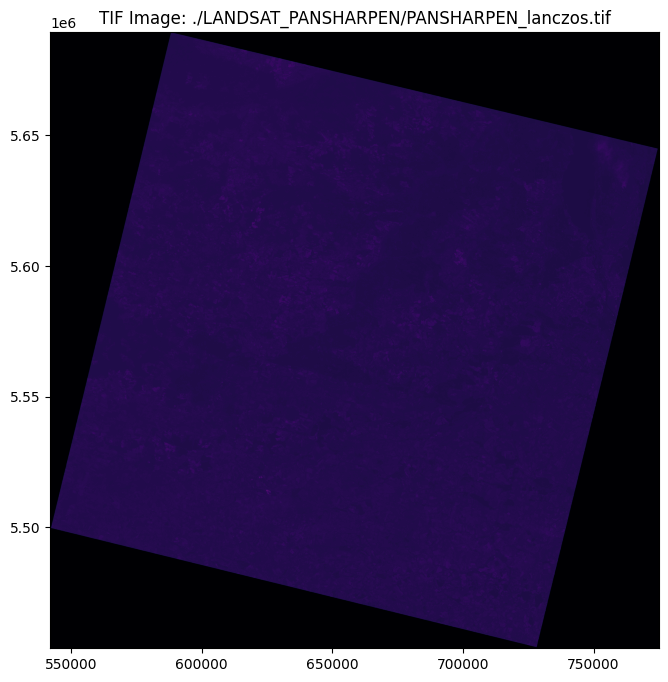

In [22]:
open_and_display_tif("./LANDSAT_PANSHARPEN/PANSHARPEN_average.tif", cmap="inferno")
open_and_display_tif("./LANDSAT_PANSHARPEN/PANSHARPEN_nearest.tif", cmap="inferno")
open_and_display_tif("./LANDSAT_PANSHARPEN/PANSHARPEN_bilinear.tif", cmap="inferno")
open_and_display_tif("./LANDSAT_PANSHARPEN/PANSHARPEN_cubic.tif", cmap="inferno")
open_and_display_tif("./LANDSAT_PANSHARPEN/PANSHARPEN_cubicspline.tif", cmap="inferno")
open_and_display_tif("./LANDSAT_PANSHARPEN/PANSHARPEN_lanczos.tif", cmap="inferno")

===================================================================================================================================================

<h3>- Після цього ви отримуєте два 30 метрових RGB
зображення - перший оригінальний, другий паншарпнутий. Підрахуйте
метрики точності паншарпенінгу (це будь які вам відомі метрики які можна
використовувати для валідації регресії, наприклад r square). </h3>


In [26]:
pansharpen_methods = {
   'average': rasterio.open('./LANDSAT_PANSHARPEN/PANSHARPEN_average.tif').read().flatten(),
   'nearest': rasterio.open('./LANDSAT_PANSHARPEN/PANSHARPEN_nearest.tif').read().flatten(),
   'bilinear': rasterio.open('./LANDSAT_PANSHARPEN/PANSHARPEN_bilinear.tif').read().flatten(),
   'cubic': rasterio.open('./LANDSAT_PANSHARPEN/PANSHARPEN_cubic.tif').read().flatten(),
   'cubicspline': rasterio.open('./LANDSAT_PANSHARPEN/PANSHARPEN_cubicspline.tif').read().flatten(),
   'lanczos': rasterio.open('./LANDSAT_PANSHARPEN/PANSHARPEN_lanczos.tif').read().flatten()
}

# Відкриття вихідного файлу для порівняння
reference = rasterio.open('./concat_LC08_25_RGB/concatenated_RGB.tif').read().flatten()

# Середньоквадратичні помилки (MSE) для кожного методу паншарпенінгу
similarity_scores = {}
for method, data in pansharpen_methods.items():
   try:
       r2_score = sklearn.metrics.r2_score(reference, data)
       similarity_scores[method] = r2_score
   except ValueError as e:
       print(f"Помилка під час обробки методу '{method}': {e}. Можливо, файли мають різні розміри або формати.")

# Виведення результатів
print("R2_SCORE для кожного методу паншарпенінгу:")
for method, score in similarity_scores.items():
   print(f"{method.capitalize():12}: {score:.4f}")



R2_SCORE для кожного методу паншарпенінгу:
Average     : 0.9949
Nearest     : 0.9946
Bilinear    : 0.9944
Cubic       : 0.9940
Cubicspline : 0.9925
Lanczos     : 0.9940


===================================================================================================================================================

<h3>- За даними метриками виберіть найкращий метод паншарпенінгу.</h3>